In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time

import glob

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import mcmc_funcs

In [84]:
snums = [ 1,  11, 12, 13, 19, 2, 20, 23, 24, 25, 31, 43, 44, 48, 7, 82]
for snum in snums[0:1]:
    t = np.genfromtxt('../data/all-data-with-upper-limits.txt', usecols=[0,2,3,4,11], unpack=True)
    q = Time(t[0], format='jd')
    q.format = 'decimalyear'
    x = q.value
    y = t[1]
    yerr = t[2] / 2.
    m = np.ones_like(x, dtype=bool)
    for i,v in enumerate(y):
        if v == 0.0:
            m[i] = False
            y[i] = t[3][i]
            yerr[i] = 0.1
    ecx = (t[4] <= 9000) & (y < 12.9)
    
    sampler1 = mcmc_funcs.mcmc_upperlimits(x[m * ecx], y[m * ecx], yerr[m * ecx], 
                                          x[(~m) * ecx], y[(~m) * ecx], yerr[(~m) * ecx],
                                          print_output=True, nwalkers=200, nsamp=3000)
    
    sampler2 = mcmc_funcs.mcmc(x[m * ecx], y[m * ecx], yerr[m * ecx], 
                                          print_output=True, nwalkers=200, nsamp=3000)
    
#     fig = mcmc_funcs.plot_samples(sampler, [x[m], y[m], yerr[m], 
#                                           x[~m], y[~m], yerr[~m]], burnin=0,sampsize=30000, fill=True)
#     fig.axes[0].set_ylim(14,11)
#     fig.savefig('../figs/series/series-{}_draws.png'.format(snum), dpi=150)
    
#     fig = mcmc_funcs.plot_chains(sampler)
#     fig.savefig('../figs/series/series-{}_chains.png'.format(snum), dpi=150)
    
#     fig = mcmc_funcs.plot_corner(sampler, burnin=0)
#     fig.savefig('../figs/series/series-{}_corner.png'.format(snum), dpi=150)
    
    

MCMC result:
            m = 0.0013435957211596742 +0.00013603042030413534 -0.00014993212072880388
            b = 9.763338555567142 +0.2911669039785654 -0.2639677127844564
            f = 0.09249983355470476 +0.003699511234582134 -0.0033379051595056747
            fu = 0.31139144498176297 +0.019087508828952382 -0.019355730405332894
            
MCMC result:
            m = 0.0016580957772284325 +0.00013059958281835793 -0.00013073755934600952
            b = 9.13822002426203 +0.2533463927308066 -0.2533821256162927
            f = 0.08979896798628834 +0.003274211729418386 -0.003168441473668085
            


In [66]:
import ipdb
ipdb.pm()

> <ipython-input-65-5651b6d5ea54>(1)<module>()
----> 1 import ipdb
      2 ipdb.pm()

ipdb> q


ValueError: total size of new array must be unchanged

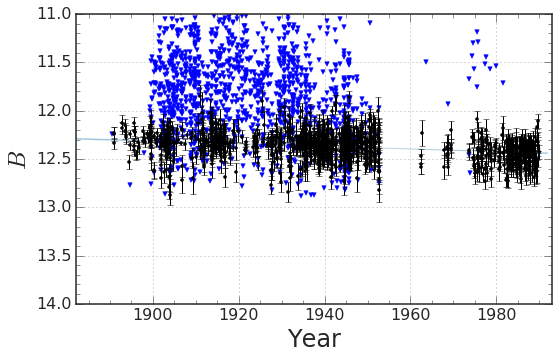

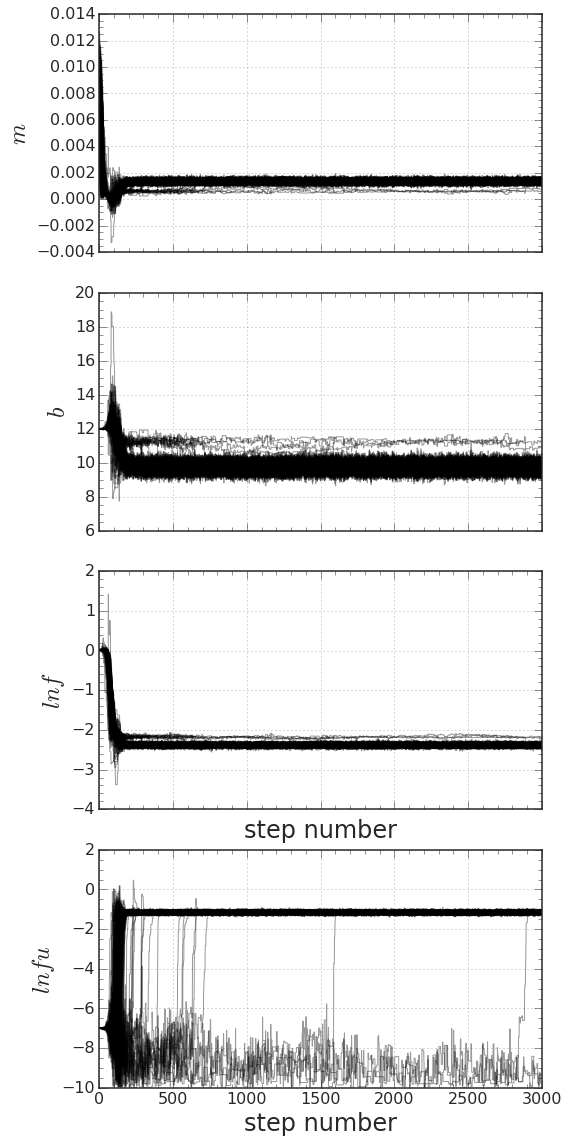

In [85]:
fig = mcmc_funcs.plot_samples(sampler1, [x[m * ecx], y[m * ecx], yerr[m * ecx], 
                              x[(~m) * ecx], y[(~m) * ecx], yerr[(~m) * ecx]], 
                              burnin=1000, sampsize=30000, fill=True, ndim=4)
fig.axes[0].set_ylim(14,11)
#     fig.savefig('../figs/series/series-{}_draws.png'.format(snum), dpi=150)

fig = mcmc_funcs.plot_chains(sampler1)
#     fig.savefig('../figs/series/series-{}_chains.png'.format(snum), dpi=150)

fig = mcmc_funcs.plot_corner(sampler1, burnin=1000)
#     fig.savefig('../figs/series/series-{}_corner.png'.format(snum), dpi=150)

ValueError: x and y must be the same size

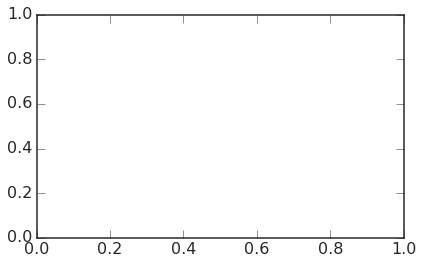

In [55]:
#plt.errorbar(x[m * ecx], y[m * ecx], yerr[m * ecx])
plt.scatter(x[(~m) * ecx], t[4][~m])

In [71]:
np.e**-1.1103944170484785

0.3294290030329806

In [75]:
sampler1.chain.shape[2]

4

In [92]:
8/9

0.8888888888888888